#### Import of Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [5]:
df = pd.read_csv('datasets/ecoli.csv')

In [6]:
df.head(5)

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Site
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,cp
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,cp
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,cp
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,cp
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,cp


In [7]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mcg     336 non-null    float64
 1   Gvh     336 non-null    float64
 2   Lip     336 non-null    float64
 3   Chg     336 non-null    float64
 4   Aac     336 non-null    float64
 5   Alm1    336 non-null    float64
 6   Alm2    336 non-null    float64
 7   Site    336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

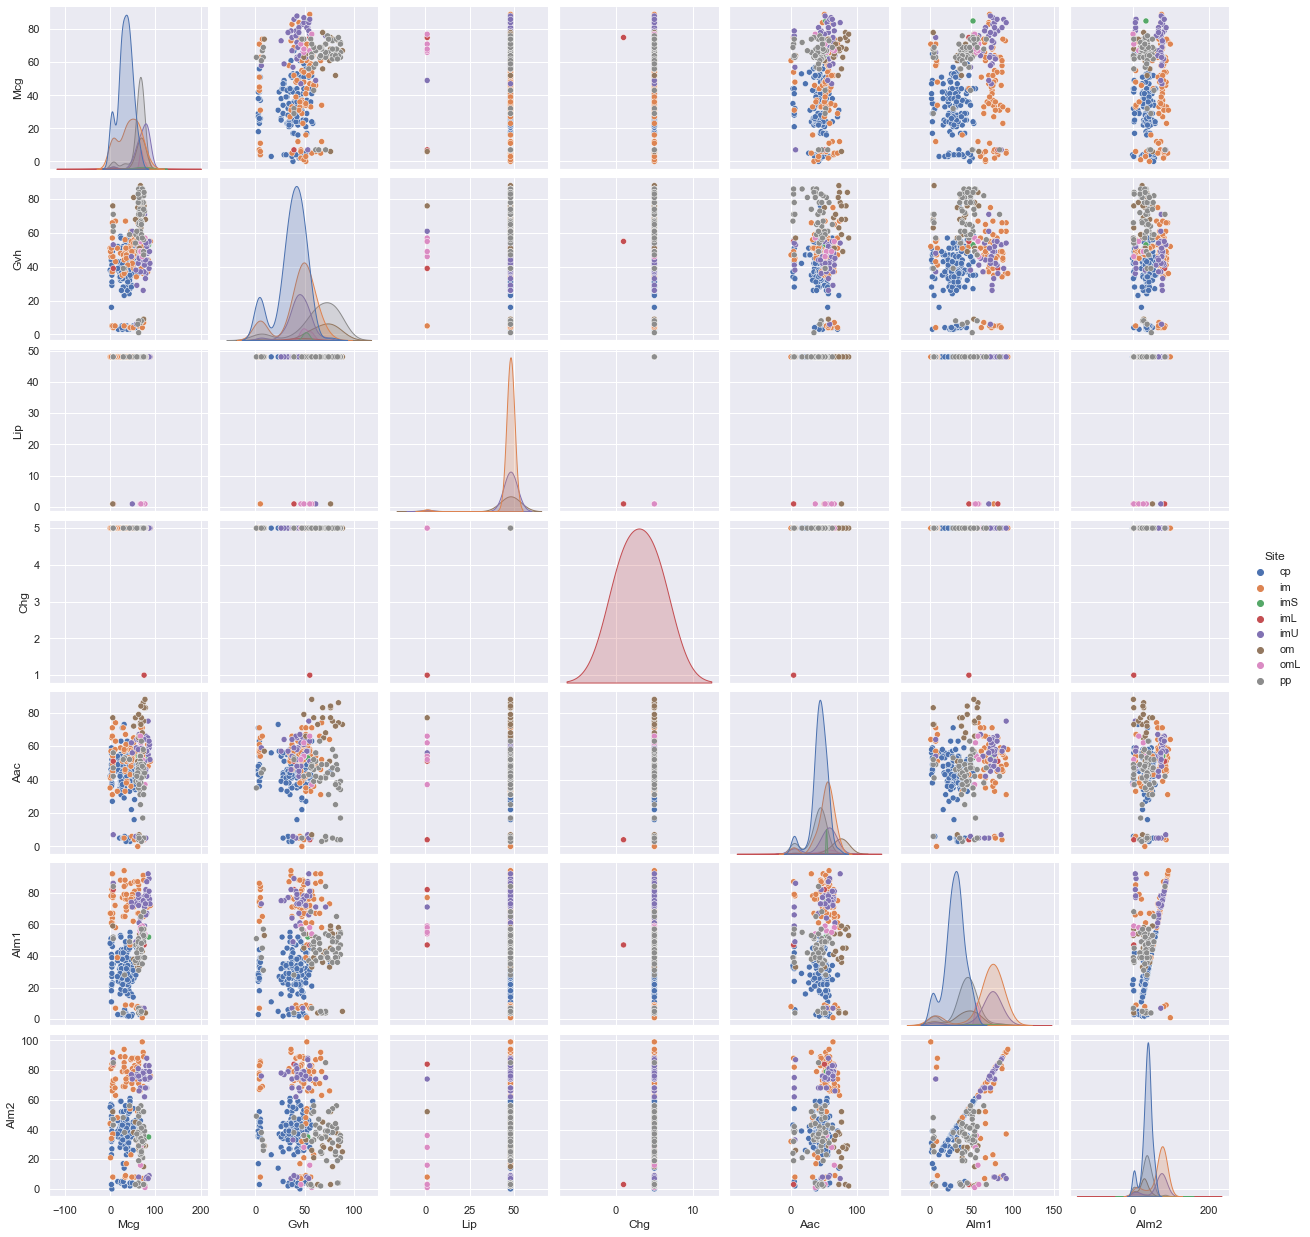

In [8]:
sns.pairplot(df, hue='Site')
plt.show()

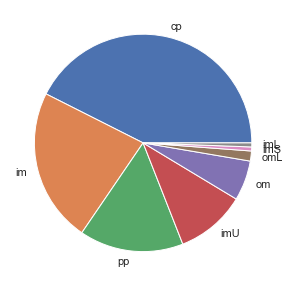

In [9]:
y =df['Site']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [10]:
X = df.drop(columns=['Site'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mcg,336.0,45.800595,23.257138,0.0,29.00,47.0,65.0,89.0
Gvh,336.0,45.232143,19.674204,1.0,37.00,46.0,56.0,88.0
Lip,336.0,46.601190,7.998612,1.0,48.00,48.0,48.0,48.0
Chg,336.0,4.988095,0.218218,1.0,5.00,5.0,5.0,5.0
Aac,336.0,46.895833,16.672379,0.0,41.00,48.0,57.0,88.0
Alm1,336.0,46.080357,23.983130,1.0,28.75,42.5,67.0,94.0
Alm2,336.0,45.473214,23.830356,0.0,32.00,42.0,68.0,99.0


#### Standardize the Data

In [11]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mcg,336.0,-8.458842e-17,1.001491,-1.972251,-0.723462,0.051648,0.826759,1.860239
Gvh,336.0,1.480297e-16,1.001491,-2.251583,-0.419047,0.039087,0.548125,2.177046
Lip,336.0,2.326182e-16,1.001491,-5.709641,0.175142,0.175142,0.175142,0.175142
Chg,336.0,-1.797504e-16,1.001491,-18.303005,0.054636,0.054636,0.054636,0.054636
Aac,336.0,-1.268826e-16,1.001491,-2.816981,-0.354156,0.066326,0.606946,2.469082
Alm1,336.0,-1.268826e-16,1.001491,-1.882473,-0.723684,-0.149509,0.873566,2.001036
Alm2,336.0,6.344132e-17,1.001491,-1.911051,-0.566224,-0.145965,0.946708,2.249510


#### Observations and Variables

In [12]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

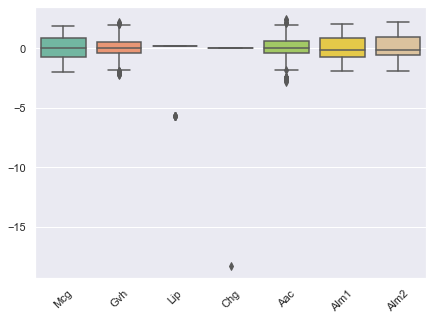

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

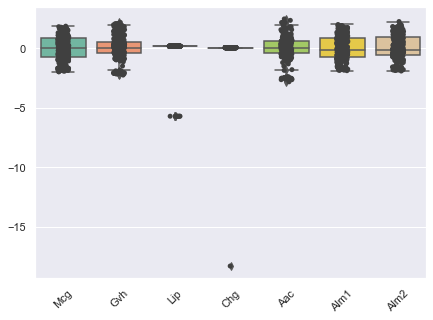

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

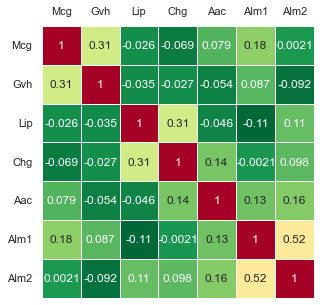

In [15]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [16]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [17]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.701140,-0.545909,0.051463,-0.846208,0.712090,-0.182230,0.172385
1,0.762765,-1.981724,1.667219,-0.413324,0.307258,-0.009192,-0.276762
2,0.239173,-0.969092,0.760719,-0.359259,1.386545,-1.076498,0.081289
3,0.003691,0.279557,-0.537330,-0.396069,0.279033,-0.086785,-0.197233
4,0.957700,-0.982916,0.466266,-0.643101,0.029204,0.376390,-0.011145
...,...,...,...,...,...,...,...
331,0.159603,1.191082,-1.119173,-0.361556,0.181416,-0.692190,-1.578983
332,0.296267,0.711552,-1.089227,-0.366710,0.385251,-0.182640,0.111117
333,0.433985,-0.709477,0.553848,-0.197557,1.385151,-1.302059,-0.123075
334,0.210793,0.608414,-0.895763,0.145408,-0.063601,0.021212,0.025589


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (23.4% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

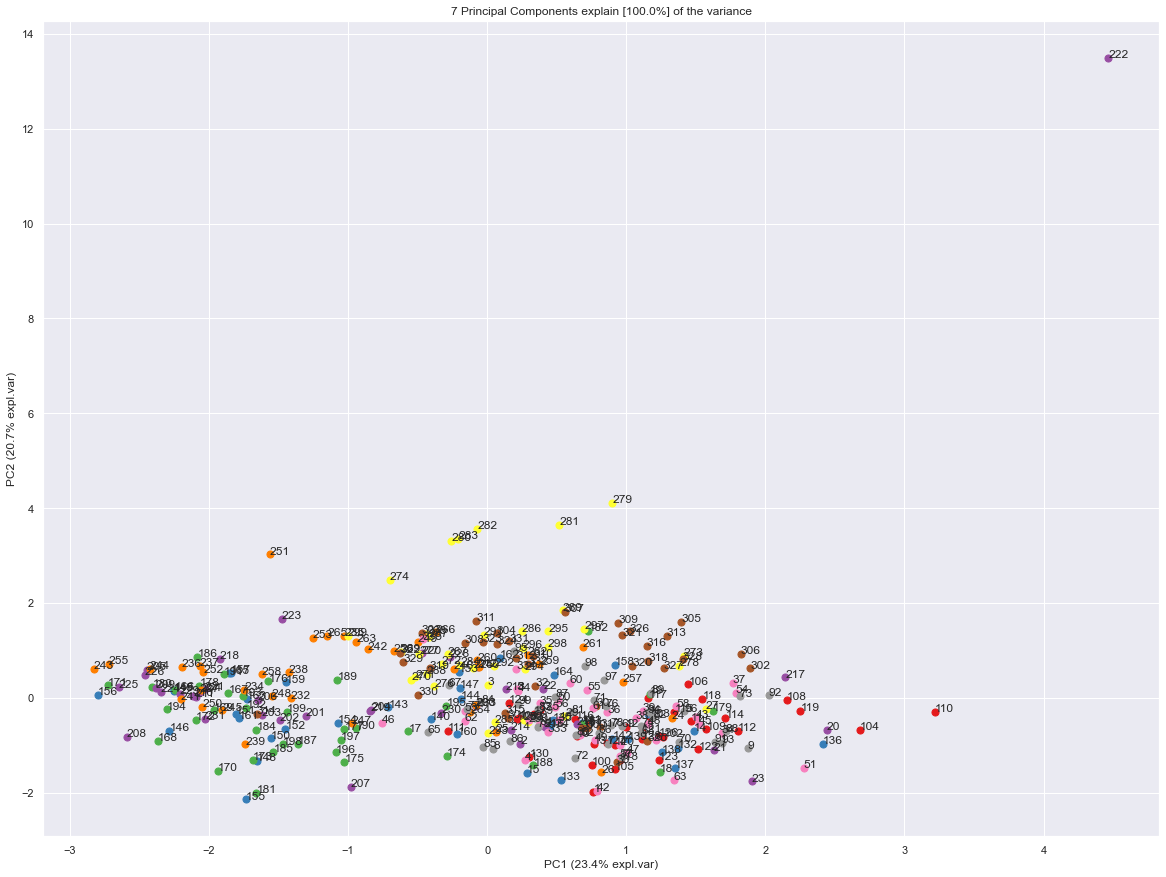

In [18]:
model.scatter(label=True, legend=False)

Eigenvectors

In [19]:
A = out['loadings'].T

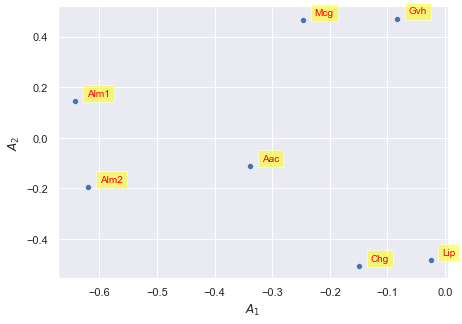

In [20]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

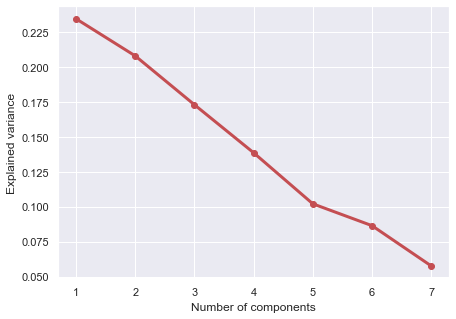

In [21]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

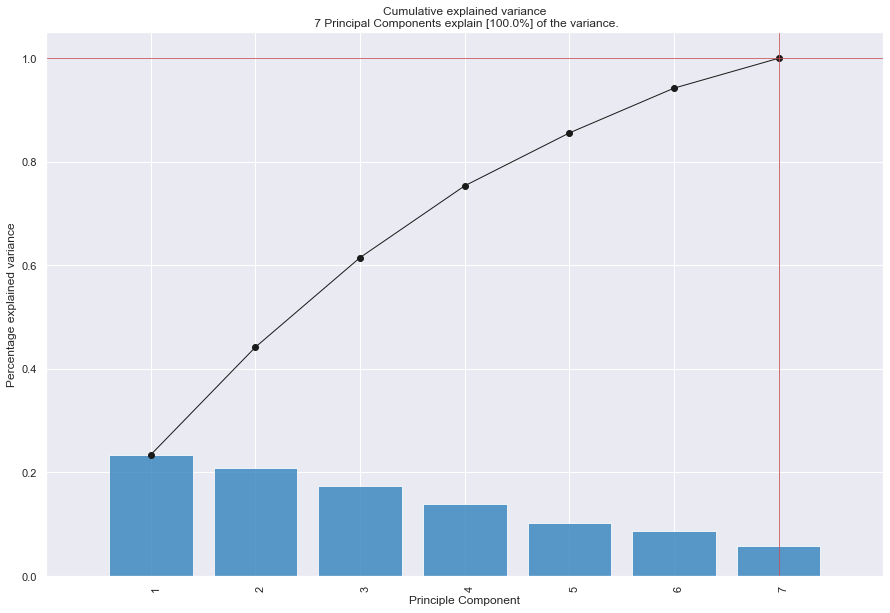

<Figure size 504x360 with 0 Axes>

In [22]:
model.plot();